**Importation des bibliothéques **




In [92]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **DATA LOADING **

In [93]:
bank=pd.read_csv("bank.csv")

In [94]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Data analyses**

In [95]:
bank.shape # 17 columns #11162 rows 

(11162, 17)

In [96]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [97]:
bank.info() # type: int/object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [98]:
bank.isnull().sum() # Aucune valeur manquante 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# **DATA VISUALIZATION**

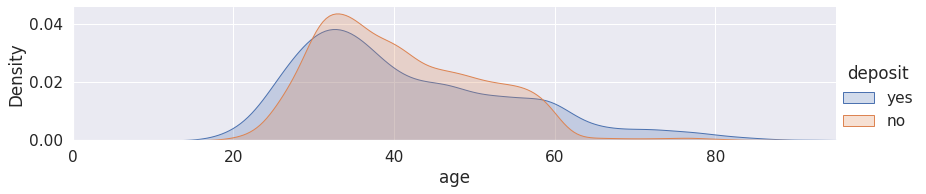

In [99]:
facet = sns.FacetGrid(bank, hue="deposit",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, bank['age'].max())) 
facet.add_legend()
 
plt.show()

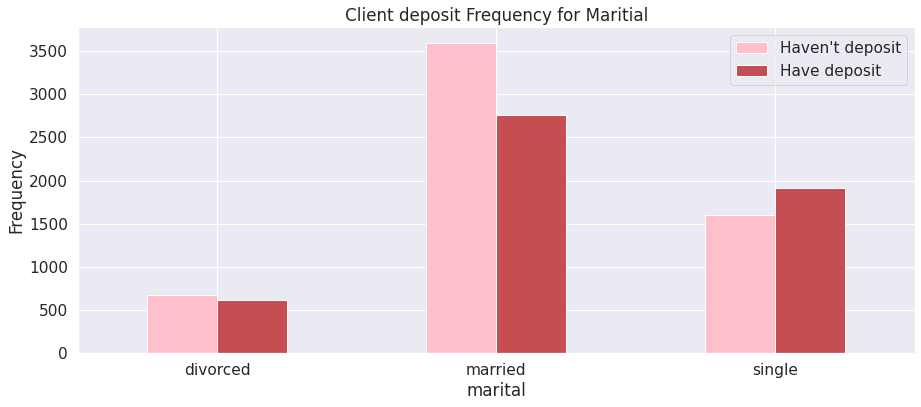

In [100]:
pd.crosstab(bank.marital,bank.deposit).plot(kind="bar",figsize=(15,6),color=["pink","r" ])
plt.title('Client deposit Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't deposit", "Have deposit "])
plt.ylabel('Frequency')
plt.show()

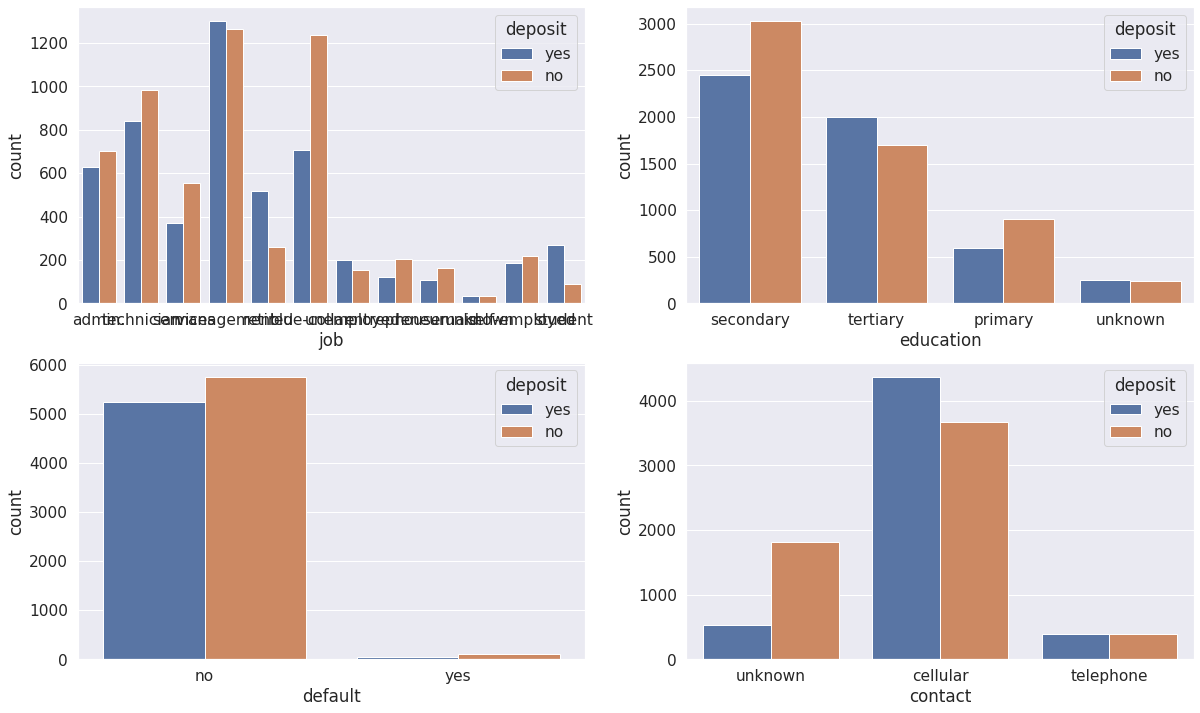

In [101]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='job', hue='deposit',data = bank, ax=axarr[0][0])
sns.countplot(x='education', hue = 'deposit',data = bank, ax=axarr[0][1])
sns.countplot(x='default', hue = 'deposit',data = bank, ax=axarr[1][0])
sns.countplot(x='contact', hue = 'deposit',data = bank, ax=axarr[1][1])

In [102]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

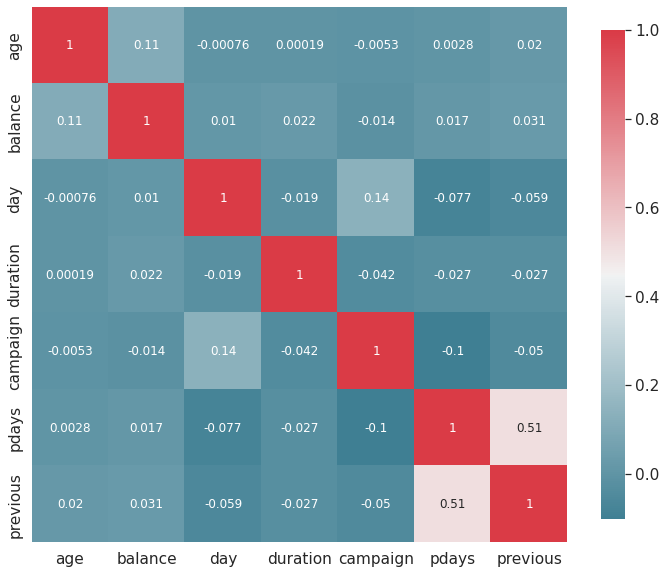

In [103]:
plot_correlation_map( bank )

# **DATA CLEANING **

In [104]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Encoding categorical data

In [105]:
bank_cust = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome','deposit']]

In [106]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [107]:

le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0,1,1,0,1,0,2,8,3,1
1,0,1,1,0,0,0,2,8,3,1
2,9,1,1,0,1,0,2,8,3,1
3,7,1,1,0,1,0,2,8,3,1
4,0,1,2,0,0,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,0,3,0
11158,7,1,1,0,0,0,2,6,3,0
11159,9,2,1,0,0,0,0,1,3,0
11160,9,1,1,0,0,1,0,8,0,0


In [108]:
bank['job']=bank_cust['job'].values
bank['marital']=bank_cust['marital'].values
bank['education']=bank_cust['education'].values
bank['default']=bank_cust['default'].values
bank['housing']=bank_cust['housing'].values
bank['loan']=bank_cust['loan'].values
bank['contact']=bank_cust['contact'].values
bank['month']=bank_cust['month'].values
bank['poutcome']=bank_cust['poutcome'].values
bank['deposit']=bank_cust['deposit'].values

In [109]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


**Splitting the dataset into the Training set and Test set**

In [110]:
X = bank.iloc[:, 0:16].values
y = bank.iloc[:, 16].values

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Feature Scaling**

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [113]:
print(X_test.shape)
print(X_train.shape)

(2233, 16)
(8929, 16)


**Importing the Keras libraries and packages**



In [114]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

**Building ANN model**

In [115]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer (with dropout)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16)) # 6 nodes in hidden layer, initialize weights uniformly, use rectifier funtion for hidden layer, except 11 input nodes
classifier.add(Dropout( 0.1)) # Disable 10% of the neurons on each iteration

# Adding the second hidden layer (with dropout)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) # input_dim already specified in previous hidden layer
classifier.add(Dropout( 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # only 1 node in output layer, use sigmoid function for probability


**Training ANN model**

In [116]:
# Compiling the ANN - apply stochastic gradient descent
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # loss defined this way since output is binary, only 1 output node

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)  

Epoch 1/40
893/893 [==============================] - 2s 2ms/step - loss: 0.5422 - accuracy: 0.7295
Epoch 2/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7891
Epoch 3/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4640 - accuracy: 0.7890
Epoch 4/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7940
Epoch 5/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.7884
Epoch 6/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.7921
Epoch 7/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4564 - accuracy: 0.7940
Epoch 8/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4579 - accuracy: 0.7928
Epoch 9/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7958
Epoch 10/40
893/893 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.7980

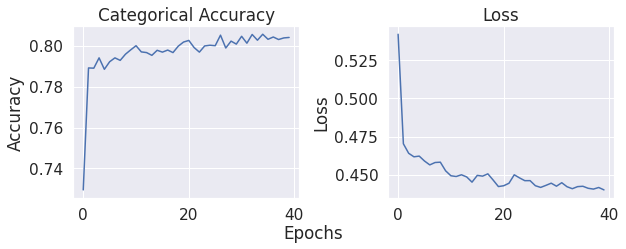

In [117]:
fig_w, fig_h = (4.5, 3.5)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
fig, axs = plt.subplots(1, 2, figsize=(2*fig_w,fig_h))

plt.sca(axs[0])
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy')
plt.title('Categorical Accuracy')

plt.sca(axs[1])
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.title('Loss')

plt.tight_layout()
fig.text(0.5, 0.01,'Epochs', ha='center')
plt.show()

**Making the predictions and evaluating the model**




In [118]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # Set threshold for returning true or false

# EXAMPLE: Predicting a single new observation
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000,8,1000,456,85963,45]]))) # Manually encode all independent variables, scale to training set
new_prediction = (new_prediction > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[889 220]
 [190 934]]


In [119]:
labels=list(pd.get_dummies(bank['deposit']).columns)

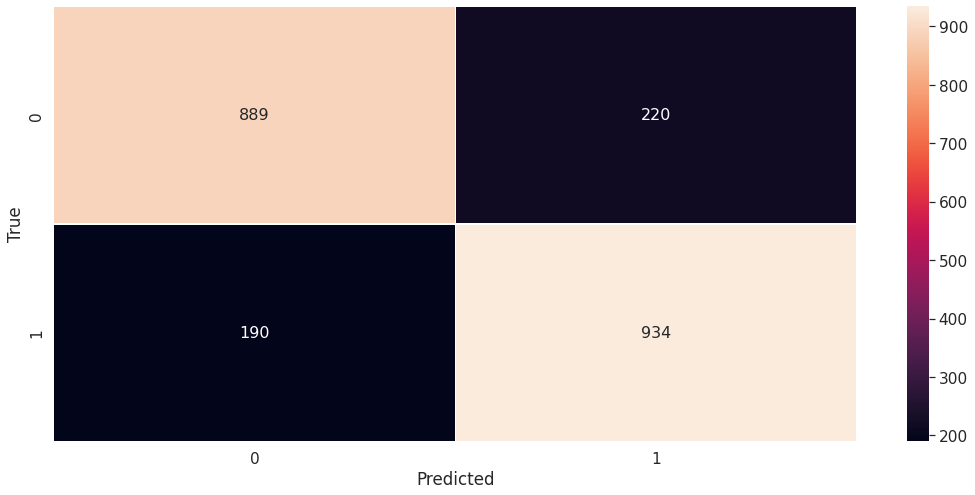

In [120]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()